# Predict the cost of medical insurance
- More specifically we are going to predict the cost of the medical insurance for individuals based on a number of different parameters such as age, sex, bmi, children smoking_status and residential_region.
- About dataset: medical cost dataset available from kaggle.


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


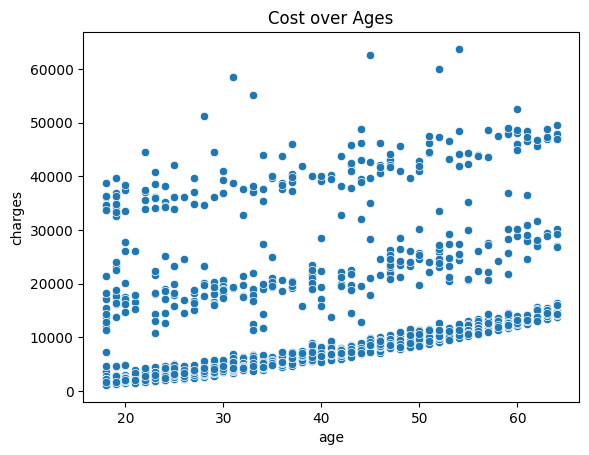

In [ ]:
sns.scatterplot(data, x='age', y='charges')
plt.title("Cost over Ages")
plt.show()

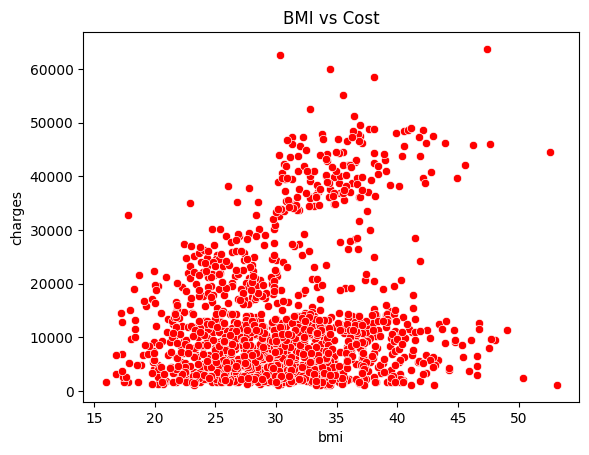

In [ ]:
sns.scatterplot(data, x='bmi', y='charges',color='r')
plt.title("BMI vs Cost")
plt.show()

Text(0.5, 1.0, 'Children Distribution')

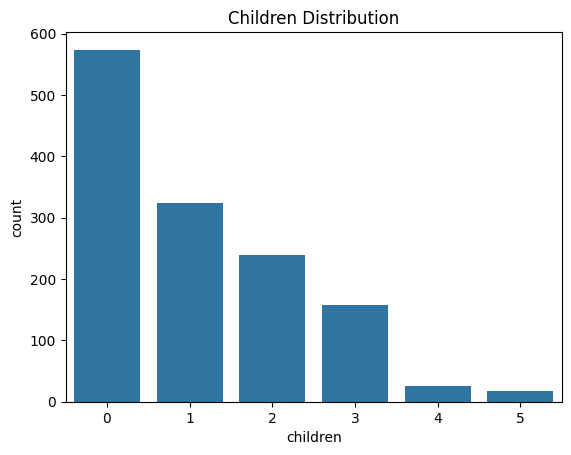

In [ ]:
sns.countplot(data, x='children')
plt.title('Children Distribution')

In [ ]:
# feature preparations
# We have to turn non-numerical features into numbers
# one-hot encoding
processed_data = pd.get_dummies(data, dtype='int')
processed_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# prepare feature set X and labels y
X = processed_data.drop('charges',axis=1)
y = processed_data['charges']

In [ ]:
X.shape, y.shape

((1338, 11), (1338,))

In [ ]:
# let's split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# building our neural model to predict
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10418.3701 - mae: 10418.3701
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7598.5791 - mae: 7598.5791 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7590.1177 - mae: 7590.1177 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7485.0298 - mae: 7485.0298 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7407.1909 - mae: 7407.1909
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7536.7354 - mae: 7536.7354
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7648.4810 - mae: 7648.4810
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7528.2441 - mae: 7528.2441 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7845.0830 - mae: 7845.0830
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7315.4927 - mae: 7315.4927 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7494.6265 - mae: 7494.6265 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [ ]:
model_1.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8147.2085 - mae: 8147.2085  


[8120.30712890625, 8120.30712890625]

In [ ]:
y_pred_m1 = model_1.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


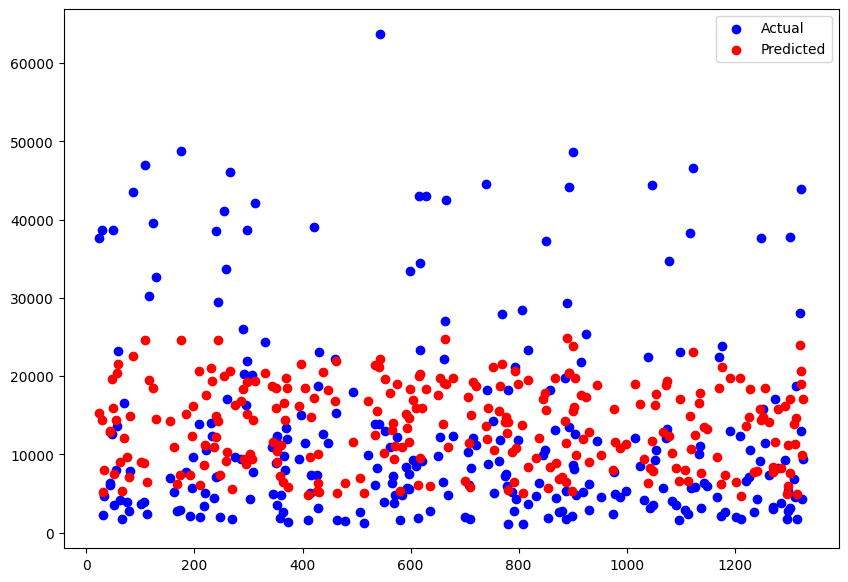

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_test.index, y=y_test,color='b', label='Actual')
plt.scatter(x=y_test.index, y=y_pred_m1, color='r', label='Predicted')
plt.legend()

**model_2**
- with model complexity.

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
 tf.keras.layers.Dense(100, activation='relu'),
 tf.keras.layers.Dense(50),
 tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
hist = model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3307.4785 - mae: 3307.4785 


[3210.814208984375, 3210.814208984375]

In [ ]:
y_pred_m2 = model_2.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


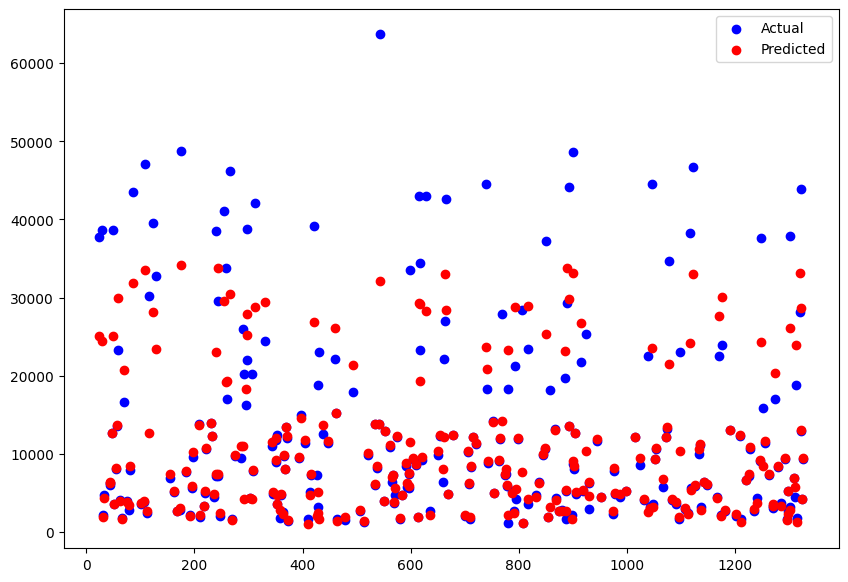

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_test.index, y=y_test,color='b', label='Actual')
plt.scatter(x=y_test.index, y=y_pred_m2, color='r', label='Predicted')
plt.legend()

Text(0, 0.5, 'loss')

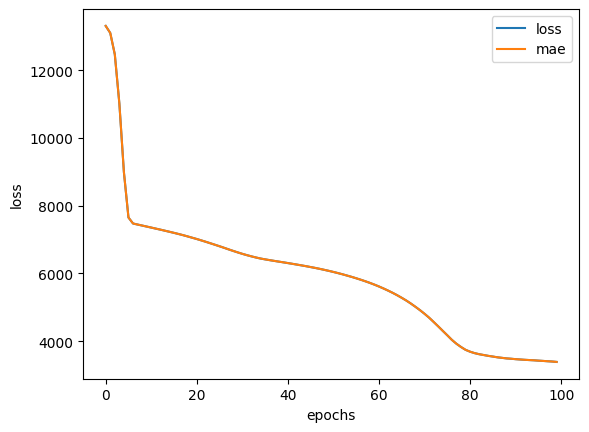

In [ ]:
pd.DataFrame(hist.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

**model_3**

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
 tf.keras.layers.Dense(100, activation='relu'),
 tf.keras.layers.Dense(100, activation='relu'),
 tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])
hist_3 = model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1751.8799 - mae: 1751.8799


[1790.0570068359375, 1790.0570068359375]

In [ ]:
y_pred_m3 = model_3.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


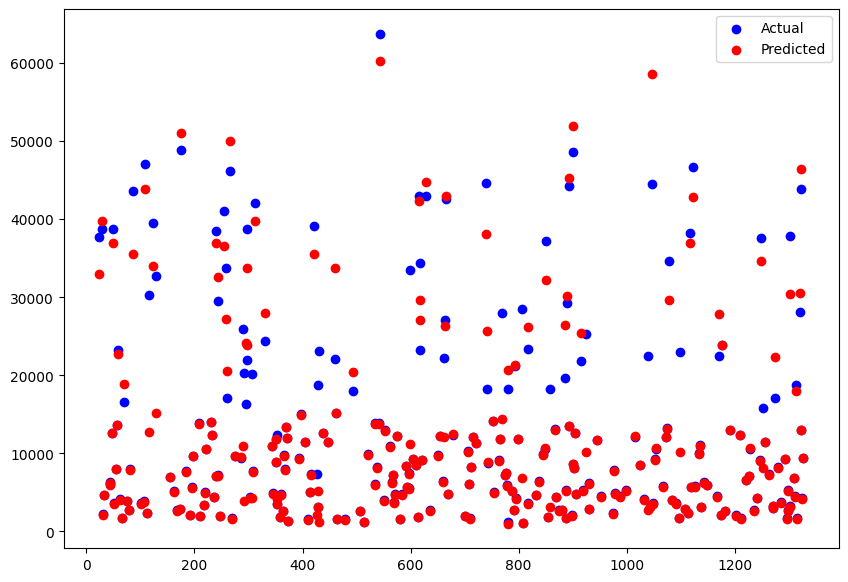

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_test.index, y=y_test,color='b', label='Actual')
plt.scatter(x=y_test.index, y=y_pred_m3, color='r', label='Predicted')
plt.legend()

Text(0.5, 0, 'epochs')

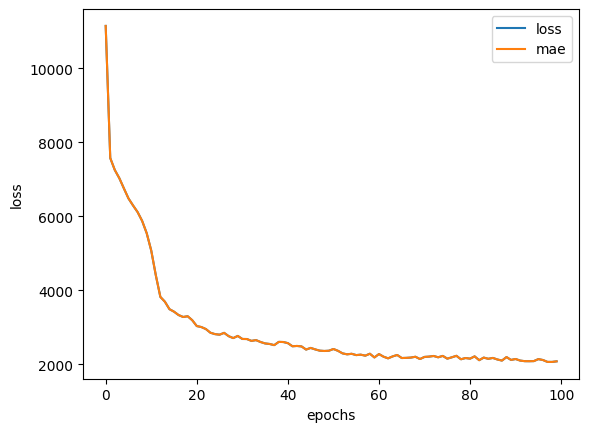

In [ ]:
pd.DataFrame(hist_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Feature Scaling**
- A common practise when working with neural network is to make sure all of the data you pass to them is some specific scale.
- Common Feature scaling practises are:
  - Normalization: (scaling all value from their original range to 0 and 1).
  - Standardization: (converts all of your data to unit variance and 0 mean)


In [ ]:
data.sample(8)

,age,sex,bmi,children,smoker,region,charges
463,56,male,25.935,0,no,northeast,11165.41765
3,33,male,22.705,0,no,northwest,21984.47061
30,22,male,35.600,0,yes,southwest,35585.57600
332,61,female,31.160,0,no,northwest,13429.03540
1052,49,male,29.830,1,no,northeast,9288.02670
551,32,female,28.930,0,no,southeast,3972.92470
132,53,female,35.900,2,no,southwest,11163.56800
679,49,female,23.180,2,no,northwest,10156.78320


sklearn library provides wide range of function used in machine learning.
- make_column_tranformer: build a multi-step preprocessing function for the following transformations:
- MinMaxScaler: function used for normalizing columns.
- OneHotEncoder: one hot encode the non-numerical columns.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('charges',axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)


In [ ]:
X_train.iloc[0]

,560
age,46
sex,female
bmi,19.95
children,2
smoker,no
region,northwest


In [ ]:
X_train_norm[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_norm.shape, X_test_norm.shape

((1070, 11), (268, 11))

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

model_4.fit(X_train_norm, y_train, epochs=100, verbose=0)

In [ ]:
model_4.evaluate(X_test_norm, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1733.3561 - mae: 1733.3561  


[1737.879638671875, 1737.879638671875]

In [ ]:
y_pred_m4 = model_4.predict(X_test_norm)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


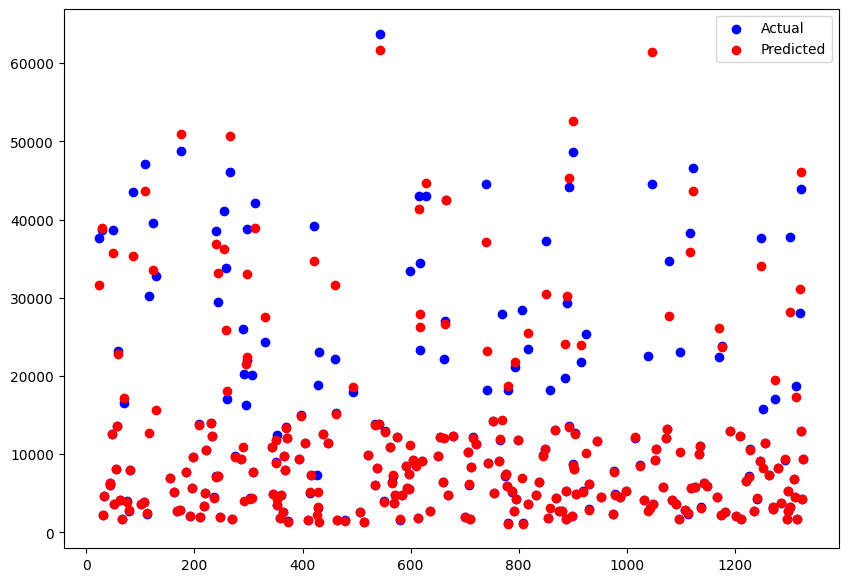

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_test.index, y=y_test,color='b', label='Actual')
plt.scatter(x=y_test.index, y=y_pred_m4, color='r', label='Predicted')
plt.legend()